# 1조 1차 발표 + 기존 가설 정리(복습)
#### 엄정민, 이세림, 임정연, 정수빈, 멘토: 조정선
## -reason_no_worker를 취업자와 실업자로 구분
#### --> occupation과 company_size가 결측치인 경우와 아닌 경우로 
#### -->취업자 중 occupation과 company_size가 있는 경우와 실업자 중 occupation 과 company_size가 있는 경우만 남겼음.
## -id 삭제X
## -음수값을 가지는 income에 집중했었음
#### --> 어떤 종류의 변수가 음수income, 양수income에 영향을 더 미치는가

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import math
warnings.filterwarnings('ignore')
df1=pd.read_csv("C:/Users/user2212/Desktop/Parrot/프로젝트/normal.csv")

# INCOME/CPI 처리
### (2020년 기준)

In [121]:
cpi_data = pd.read_csv("C:/Users/user2212/Desktop/Parrot/프로젝트/cpi_data.csv")
cpi_data = cpi_data[['year', 'cpi']]

df1 = df1.merge(cpi_data, on='year', how='left')
df1['new_income'] = (df1['income'] / df1['cpi'] )*100
df1=df1.drop(['id','wave','gender','income','cpi','year'],axis=1)

In [122]:
#new_income의 이상치 제거
df1=df1[df1.new_income<100000] #77108
df1=df1[df1.new_income>=300] #5->75204, #3->76685 (0.7%)
df1

,region,family_member,year_born,education_level,marriage,occupation,company_size,reason_none_worker,new_income
0,3,1,1940,2,2,617,1,,618.279570
1,4,3,1939,5,1,,,9,1728.557013
2,2,3,1967,6,3,510,1,,3108.932462
3,4,5,1947,3,1,611,1,,4771.968854
4,4,2,1940,2,1,,,10,1647.540984
...,...,...,...,...,...,...,...,...,...
77583,2,4,1965,5,1,941,5,,7512.820513
77584,2,4,1972,5,1,512,2,,4919.842313
77585,2,4,1941,2,1,,,7,3728.569271
77586,7,1,1936,3,2,,,10,1712.411705


In [123]:
df1.minus=0  
df1.loc[df1['new_income']<0,'minus'] = df1.loc[df1['new_income'] < 0,'new_income']

df1['log_minus']=np.log(abs(df1['minus']))
df1 = df1.drop('minus', axis=1)
df1 = df1.drop('log_minus', axis=1)

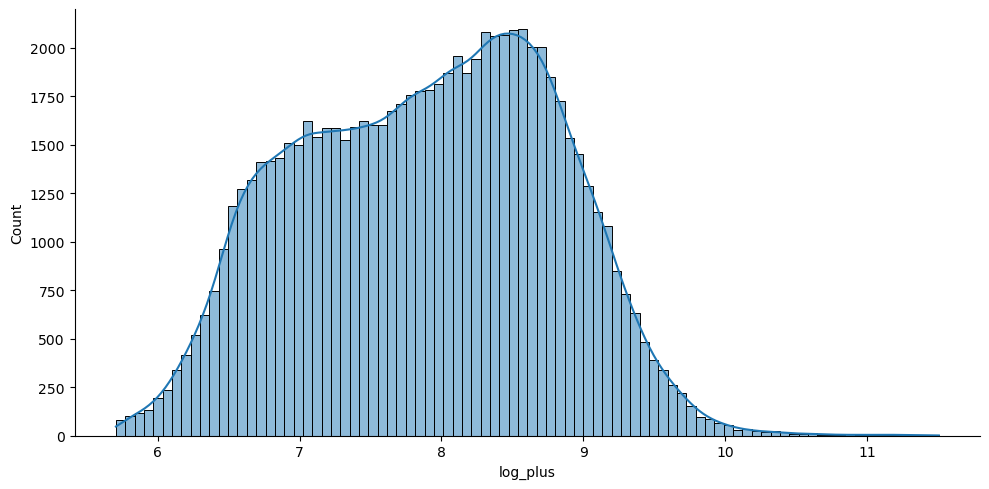

In [124]:
df1.plus=0
df1.loc[df1['new_income'] >= 0, 'plus'] = df1.loc[df1['new_income'] >= 0,'new_income']
#sns.displot(df1.plus, height=5, aspect=2, kde=True)
#sns.histplot(df1['plus']) #양수만 있어서 절댓값 안함!!
df1['log_plus']=np.log(df1['new_income'])
df1 = df1.dropna(subset=['log_plus'])
sns.displot(df1.log_plus, height=5, aspect=2, kde=True)
plt.show()
df1 = df1.drop('plus', axis=1)

In [125]:
df1

,region,family_member,year_born,education_level,marriage,occupation,company_size,reason_none_worker,new_income,log_plus
0,3,1,1940,2,2,617,1,,618.279570,6.426941
1,4,3,1939,5,1,,,9,1728.557013,7.455042
2,2,3,1967,6,3,510,1,,3108.932462,8.042035
3,4,5,1947,3,1,611,1,,4771.968854,8.470514
4,4,2,1940,2,1,,,10,1647.540984,7.407039
...,...,...,...,...,...,...,...,...,...,...
77583,2,4,1965,5,1,941,5,,7512.820513,8.924366
77584,2,4,1972,5,1,512,2,,4919.842313,8.501032
77585,2,4,1941,2,1,,,7,3728.569271,8.223780
77586,7,1,1936,3,2,,,10,1712.411705,7.445658


### region 전처리 서울/수도권/비수도권 처리 후 categorical 처리

In [126]:
# 비수도권:0, 서울:1, 경기:2 로 만들기
def get_label(region):
    if region == 1:
        label = 1
    elif region == 2:
        label = 2
    else:
        label = 0
    return label

df1['new_region'] = df1['region'].apply(get_label)
df1=df1.drop(['region'],axis=1)

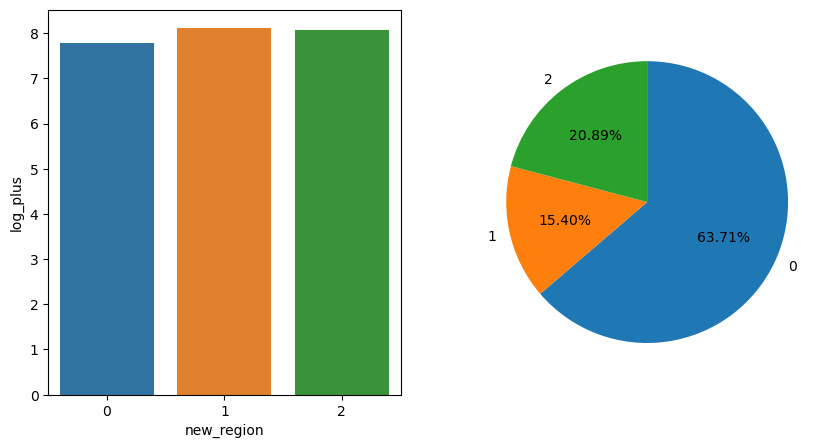

In [127]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

df4=df1.groupby(df1['new_region']).agg('mean')
sns.barplot(data=df4,x=df4.index,y='log_plus',ax=ax1)

df5=df1.groupby(df1['new_region']).agg('count')
#plt.pie(data=df5,x=df5.index,annot=True)
#plt.pie(data=df5, x=df5.values, labels=df5.index)
labels=df5.index
frequency=df5.log_plus
ax2.pie(frequency, ## 파이차트 출력
       labels=labels, ## 라벨 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p) ## 퍼센티지 출력
       )
 
plt.show()

### education_level 전처리 2(edu X)/3,4(초중)/5(고)/6,7,8,9(대학 진학 이상) 처리 후 categorical 처리

In [128]:
def get_label(education_level):
    if education_level == 2:
        label = 1
    elif education_level == 3 | 4:
        label = 2
    elif education_level == 5:
        label = 3
    else:
        label = 4
    return label

df1['new_education_level'] = df1['education_level'].apply(get_label)
df1=df1.drop(['education_level'],axis=1)

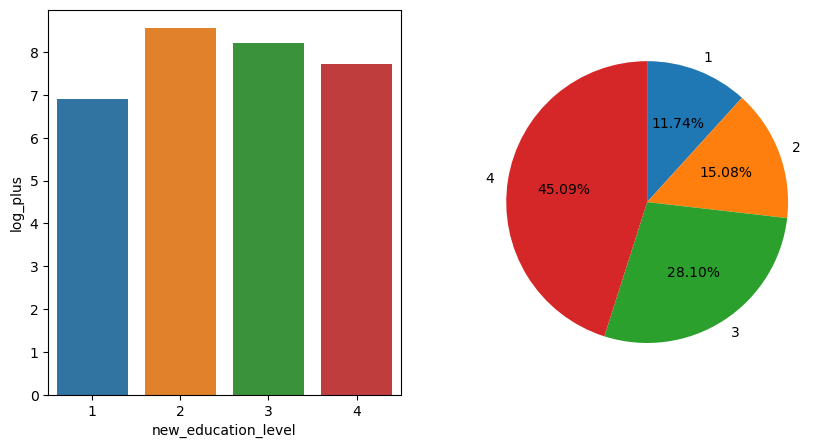

In [129]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

df4=df1.groupby(df1['new_education_level']).agg('mean')
sns.barplot(data=df4,x=df4.index,y='log_plus',ax=ax1)

df5=df1.groupby(df1['new_education_level']).agg('count')
#plt.pie(data=df5,x=df5.index,annot=True)
#plt.pie(data=df5, x=df5.values, labels=df5.index)
labels=df5.index
frequency=df5.log_plus
ax2.pie(frequency, ## 파이차트 출력
       labels=labels, ## 라벨 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p) ## 퍼센티지 출력
       )
 
plt.show()

### company_size 전처리 대형/중형/소형 처리 후 categorical 처리

In [130]:
#feature가 너무 많아지는 것을 방지하기 위해 label 재조정
#1~3은 1 / 4~7은 2 / 8~ 은 3   -->  소형, 중형, 대형회사로 해석
df1['realcom']=0
df1['realcom']=df1['realcom'].astype(int)
df1.loc[df1['company_size']==' ','company_size']=-1
df1['company_size']=df1['company_size'].astype(int)
def get_label(company_size):
    if (company_size <= 3 & company_size>=1):
        label = 1
    elif company_size<=7:
        label = 2
    else:
        label = 3
    return label

df1['realcom'] = df1['company_size'].apply(get_label)
df1=df1.drop(columns='company_size',axis=1)

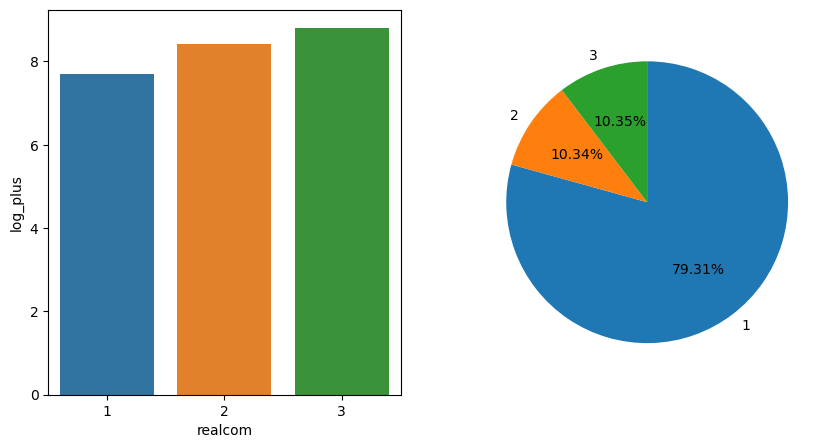

In [131]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

df4=df1.groupby(df1['realcom']).agg('mean')
sns.barplot(data=df4,x=df4.index,y='log_plus',ax=ax1)

df5=df1.groupby(df1['realcom']).agg('count')
#plt.pie(data=df5,x=df5.index,annot=True)
#plt.pie(data=df5, x=df5.values, labels=df5.index)
labels=df5.index
frequency=df5.log_plus
ax2.pie(frequency, ## 파이차트 출력
       labels=labels, ## 라벨 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p) ## 퍼센티지 출력
       )
 
plt.show()

### reason_none_worker 전처리 취업자와 실업자 분류

In [135]:
df3=df1.replace(' ', np.nan)
df3=df3.replace('NaN', np.nan)
df3=df3[df3.log_plus!='#NAME?']
df3=df3.applymap(lambda x: float(x))

In [136]:
df3.reason_none_worker.value_counts()

10.0    16103
8.0      3541
9.0      2268
1.0      2082
7.0       920
6.0       917
4.0       580
5.0       279
11.0      193
3.0        41
2.0         7
Name: reason_none_worker, dtype: int64

In [133]:
df3.drop(df3[df3['reason_none_worker']==5.0].index, inplace=True)
df3['reason_none_worker']=df3['reason_none_worker'].replace(np.nan, 12.0)
df3['reason_none_worker']=df3['reason_none_worker'].apply(lambda x: 2 if x==12.0 else 1)

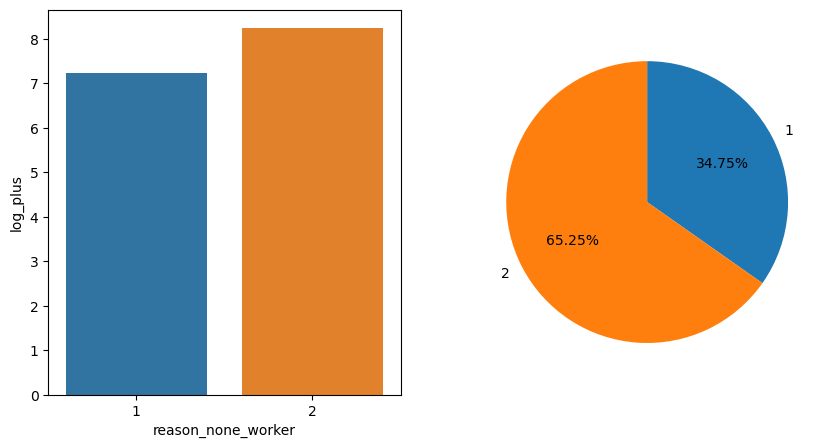

In [115]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

df4=df3.groupby(df3['reason_none_worker']).agg('mean')
sns.barplot(data=df4,x=df4.index,y='log_plus',ax=ax1)

df5=df3.groupby(df3['reason_none_worker']).agg('count')
#plt.pie(data=df5,x=df5.index,annot=True)
#plt.pie(data=df5, x=df5.values, labels=df5.index)
labels=df5.index
frequency=df5.log_plus
ax2.pie(frequency, ## 파이차트 출력
       labels=labels, ## 라벨 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p) ## 퍼센티지 출력
       )
 
plt.show()

### occupation 전처리 첫 번째 자리 숫자로

In [116]:
df3['occupation']=df3['occupation'].apply(lambda x: math.trunc(x/100) if x>=100 else x)
df3['occupation']=df3['occupation'].apply(lambda x: math.trunc(x/10) if x>=10 else x)

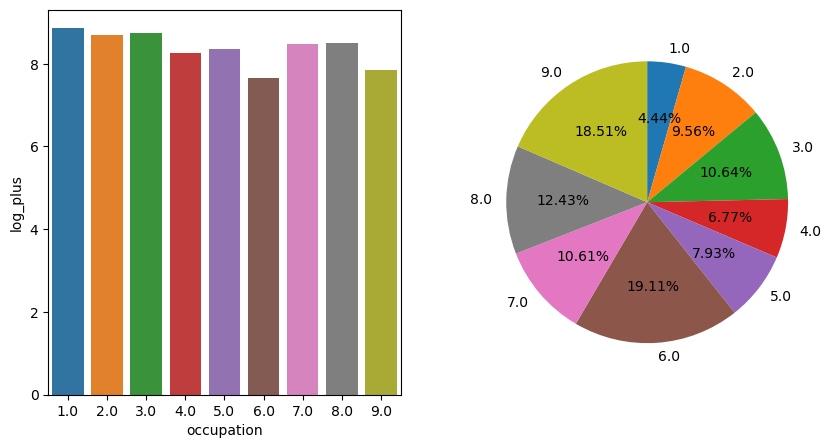

In [117]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

df4=df3.groupby(df3['occupation']).agg('mean')
sns.barplot(data=df4,x=df4.index,y='log_plus',ax=ax1)

df5=df3.groupby(df3['occupation']).agg('count')
#plt.pie(data=df5,x=df5.index,annot=True)
#plt.pie(data=df5, x=df5.values, labels=df5.index)
labels=df5.index
frequency=df5.log_plus
ax2.pie(frequency, ## 파이차트 출력
       labels=labels, ## 라벨 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p) ## 퍼센티지 출력
       )
 
plt.show()

### 추가 시각화(marriage,family_member,age)

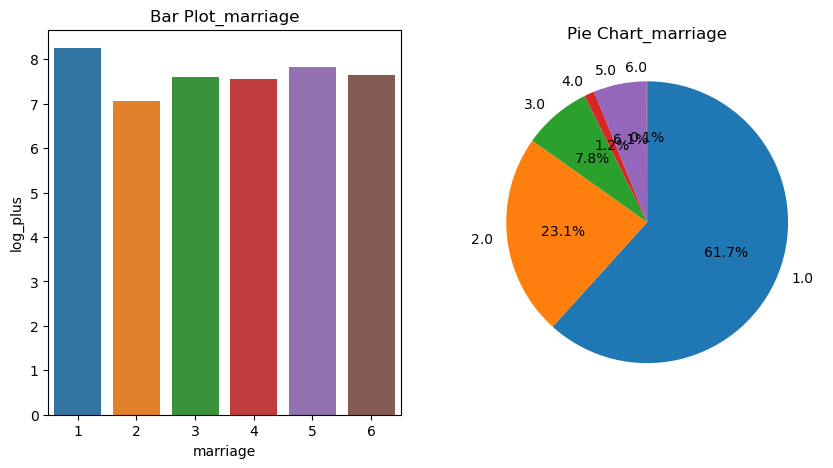

In [118]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

df4=df1.groupby(df1['marriage']).agg('mean')
sns.barplot(data=df4,x=df4.index,y='log_plus', ax=ax1)
ax1.set_title('Bar Plot_marriage')

plt.subplot(1,2,2)
df5=df3.groupby(df3['marriage']).agg('count')
#plt.pie(data=df5,x=df5.index,annot=True)
#plt.pie(data=df5, x=df5.values, labels=df5.index)
labels=df5.index
frequency=df5.log_plus
ax2.pie(frequency, ## 파이차트 출력
       labels=labels, ## 라벨 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.1f}%'.format(p) ## 퍼센티지 출력
       )
ax2.set_title('Pie Chart_marriage')
 
plt.show()

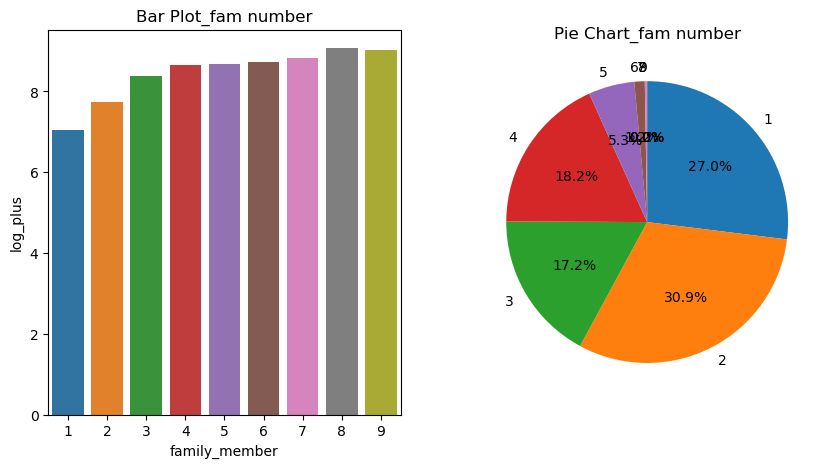

In [119]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

df4=df1.groupby(df1['family_member']).agg('mean')
sns.barplot(data=df4,x=df4.index,y='log_plus',ax=ax1)
ax1.set_title('Bar Plot_fam number')

df5=df1.groupby(df1['family_member']).agg('count')
#plt.pie(data=df5,x=df5.index,annot=True)
#plt.pie(data=df5, x=df5.values, labels=df5.index)
labels=df5.index
frequency=df5.log_plus
ax2.pie(frequency, ## 파이차트 출력
       labels=labels, ## 라벨 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p 
        : '{:.1f}%'.format(p) ## 퍼센티지 출력
       )
ax2.set_title('Pie Chart_fam number')
 
plt.show()

#### 모두 원핫 인코딩

In [66]:
df1=pd.get_dummies(data=df1,columns=['new_region'],drop_first=True)
df1=pd.get_dummies(data=df1,columns=['new_education_level'],drop_first=True)
df1=pd.get_dummies(data=df1, columns=['realcom'], drop_first=True)
df1=pd.get_dummies(data=df1,columns=['marriage'],drop_first=True)
df1=pd.get_dummies(data=df1,columns=['reason_none_worker'],drop_first=True)
df1=pd.get_dummies(data=df1, columns=['occupation'], drop_first=True)